# <b>General Election 2019 Dataset EDA.</b>

<img src="https://i0.wp.com/theunn.com/wp-content/uploads/2019/04/Optimism-persists-but-concerns-about-terrorism-and-Pakistan-loom-large-among-Indian-Voters.jpg?resize=678%2C381&ssl=1"/>

## Questions
### Some basic questions that i used to analyze the data set:
- Which constituencies had the highest number of candidates?
- Which were the top parties wrt to the number of candidates?
- Which candidates had the highest percentage of votes?
- How was the age of candidates distributed?
- Which candidates had the highest number of criminal records?
### And much more!!

In [1]:
# Importing Libraries for Data Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# Importing Data File
election_data = pd.read_csv('https://raw.githubusercontent.com/akkysanap22/General-Election-2019/master/LS_2.0.csv')

---
## Source
- The dataset used in this analysis project can be downloaded from <a href="https://www.kaggle.com/prakrutchauhan/indian-candidates-for-general-election-2019">here</a>
- Also the data collection was done by Kaggle user Prakrut Chahaun.
---

In [3]:
election_data.sample(10)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
1827,Madhya Pradesh,SAGAR,RAJBAHADUR SINGH,1,BJP,Lotus,MALE,1,51.0,GENERAL,Post Graduate,"Rs 1,64,16,828\n ~ 1 Crore+","Rs 5,47,428\n ~ 5 Lacs+",645338,893,646231,40.819857,62.285164,1583129
1952,Jharkhand,SINGHBHUM,PRATAP SINGH BANARA,0,APoI,Coat,MALE,0,25.0,ST,Post Graduate,"Rs 52,985\n ~ 52 Thou+",Rs 0\n ~,11286,12,11298,0.889664,1.284570,1269917
511,Tamil Nadu,CHENNAI SOUTH,T.SUMATHY (A) THAMIZHACHI THANGAPANDIAN,1,DMK,Rising Sun,FEMALE,0,56.0,GENERAL,Doctorate,"Rs 9,17,93,460\n ~ 9 Crore+","Rs 5,00,000\n ~ 5 Lacs+",563240,1632,564872,28.622374,50.151064,1973533
1436,Uttar Pradesh,MOHANLALGANJ,Kaushal Kishore,1,BJP,Lotus,MALE,1,59.0,SC,Graduate,"Rs 5,55,30,561\n ~ 5 Crore+",Rs 0\n ~,627223,2776,629999,31.135186,49.583576,2023431
1063,Tamil Nadu,KANCHEEPURAM,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21591,70,21661,1.317585,1.749454,1643992
781,Uttar Pradesh,GHAZIPUR,AFZAL ANSARI,1,BSP,Elephant,MALE,5,65.0,GENERAL,Post Graduate,"Rs 13,79,38,756\n ~ 13 Crore+",Rs 0\n ~,564144,1938,566082,30.093505,51.113637,1881077
809,Uttar Pradesh,GORAKHPUR,Ravindra Shyamnarayan Shukla alias Ravi Kishan,1,BJP,Lotus,MALE,0,51.0,GENERAL,12th Pass,"Rs 20,84,94,688\n ~ 20 Crore+","Rs 1,77,11,043\n ~ 1 Crore+",715010,2112,717122,36.196400,60.520455,1981197
671,West Bengal,DUM DUM,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14466,25,14491,0.925235,1.202877,1566196
726,Uttar Pradesh,FATEHPUR,RAKESH SACHAN,0,INC,Hand,MALE,8,63.0,GENERAL,Post Graduate,"Rs 35,06,70,770\n ~ 35 Crore+","Rs 6,77,94,880\n ~ 6 Crore+",65738,339,66077,3.592485,6.326251,1839312
734,Uttar Pradesh,FIROZABAD,Shivpal Singh Yadav,0,PSPL,Key,MALE,0,64.0,GENERAL,Graduate Professional,"Rs 9,98,33,148\n ~ 9 Crore+","Rs 1,29,18,796\n ~ 1 Crore+",91651,218,91869,5.130884,8.533459,1790510


### <b>In the General Election Data we can see that the Party with 'NOTA' have missing value in entire row so we need to drop it.</b>

In [4]:
election_data=election_data[election_data['PARTY']!='NOTA']
election_data.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690


# <b>Descriptive Analysis</b>

In [5]:
election_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2261
Data columns (total 19 columns):
STATE                                       2018 non-null object
CONSTITUENCY                                2018 non-null object
NAME                                        2018 non-null object
WINNER                                      2018 non-null int64
PARTY                                       2018 non-null object
SYMBOL                                      2018 non-null object
GENDER                                      2018 non-null object
CRIMINAL
CASES                              2018 non-null object
AGE                                         2018 non-null float64
CATEGORY                                    2018 non-null object
EDUCATION                                   2018 non-null object
ASSETS                                      2018 non-null object
LIABILITIES                                 2018 non-null object
GENERAL
VOTES                               2018

In [6]:
election_data.describe()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
count,2018.000000,2018.000000,2.018000e+03,2018.000000,2.018000e+03,2018.000000,2018.000000,2.018000e+03
mean,0.267096,52.273538,2.911903e+05,1105.111001,2.922954e+05,17.596810,25.808492,1.660261e+06
std,0.442553,11.869373,2.545964e+05,1661.283371,2.555874e+05,14.886247,21.403985,3.164246e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,3.047625e+04,97.000000,3.074375e+04,1.953617,2.870669,1.530404e+06
50%,0.000000,52.000000,2.846300e+05,463.000000,2.855250e+05,18.036861,27.749894,1.679891e+06
75%,1.000000,61.000000,5.058620e+05,1545.500000,5.076175e+05,30.708115,44.349684,1.823404e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


### <b>India has the highest number of young voters in the world. Lets see what was the distribution of age of the candidates in the 2019 election.</b>

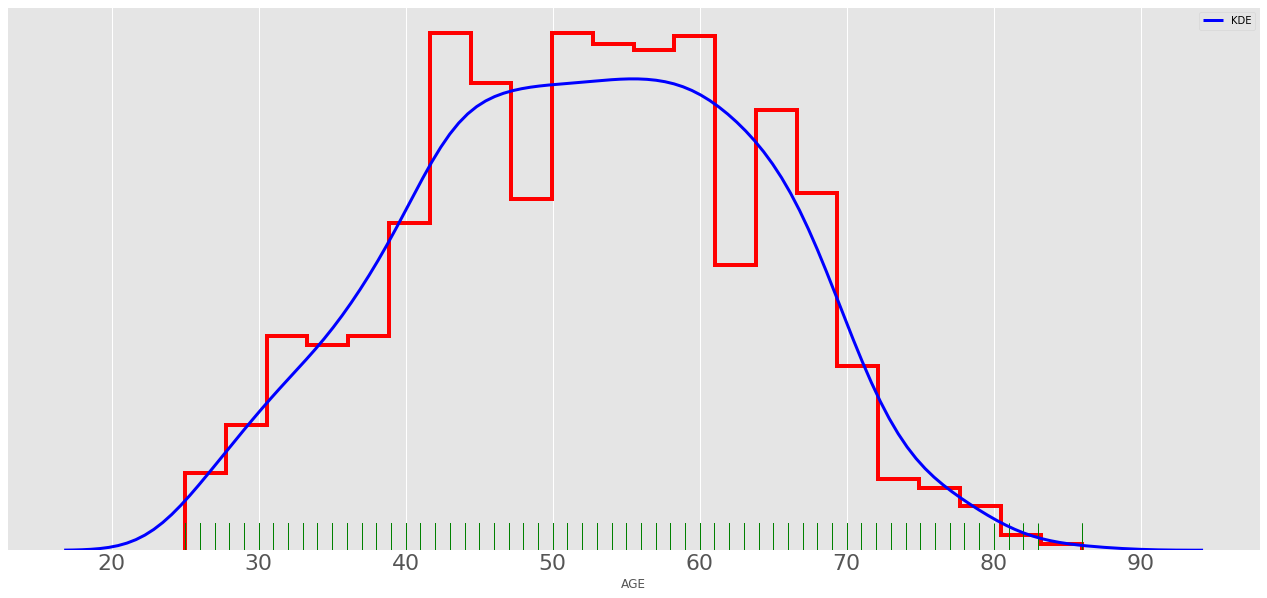

In [8]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
sns.distplot(election_data['AGE'],rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "b", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 4,
                            "alpha": 1, "color": "r"})
plt.yticks([])
plt.xticks(fontsize=22)
plt.show()

* <b>observe that the average age of a candidate is around 50 and was normally distributed.</b>

## <b>Lets see the top 10 constituencies with most candidates</b>

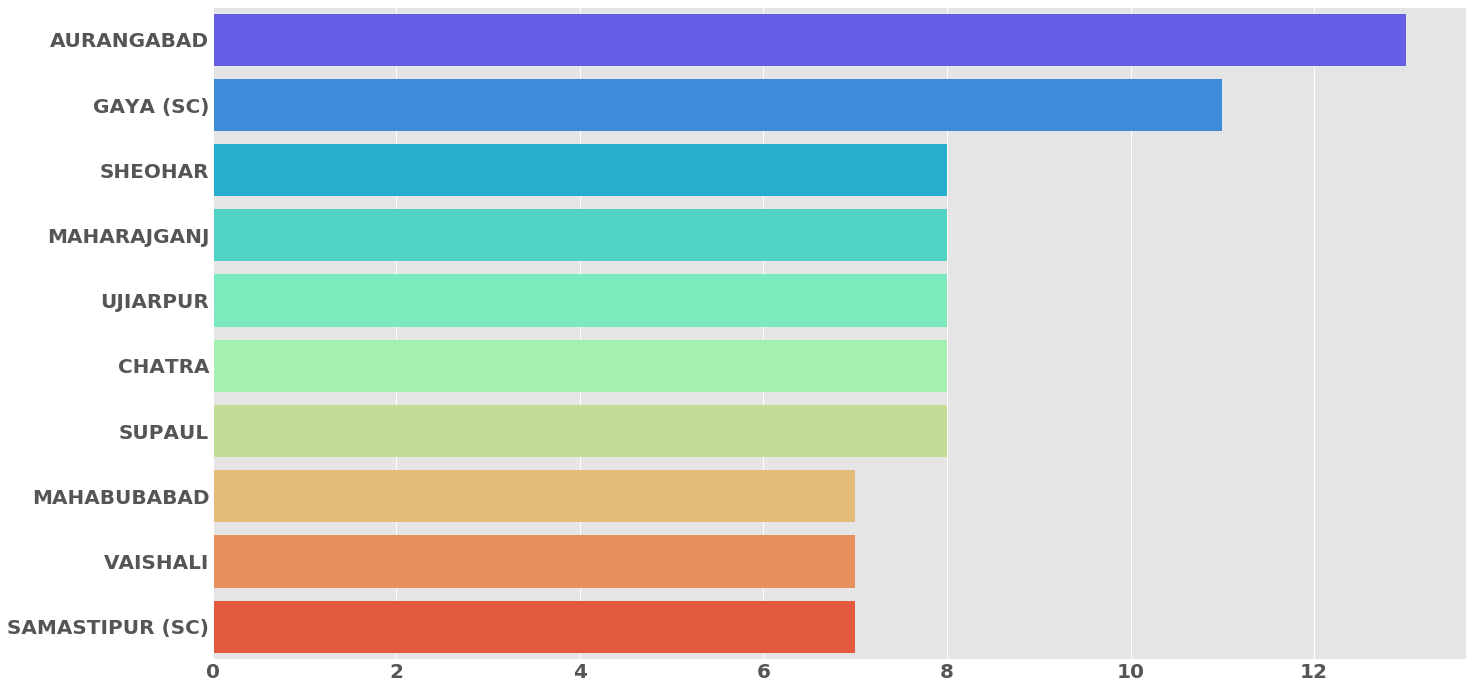

In [9]:
plt.figure(figsize=(20,12))
sns.countplot(y='CONSTITUENCY',data=election_data,order=election_data.CONSTITUENCY.value_counts().iloc[:10].index,palette='rainbow')
plt.ylabel('No of Candidates')
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=20,fontweight=1000)
plt.xlabel('')
plt.ylabel('')
plt.show()

## <b>What was the total votes distribution?</b>

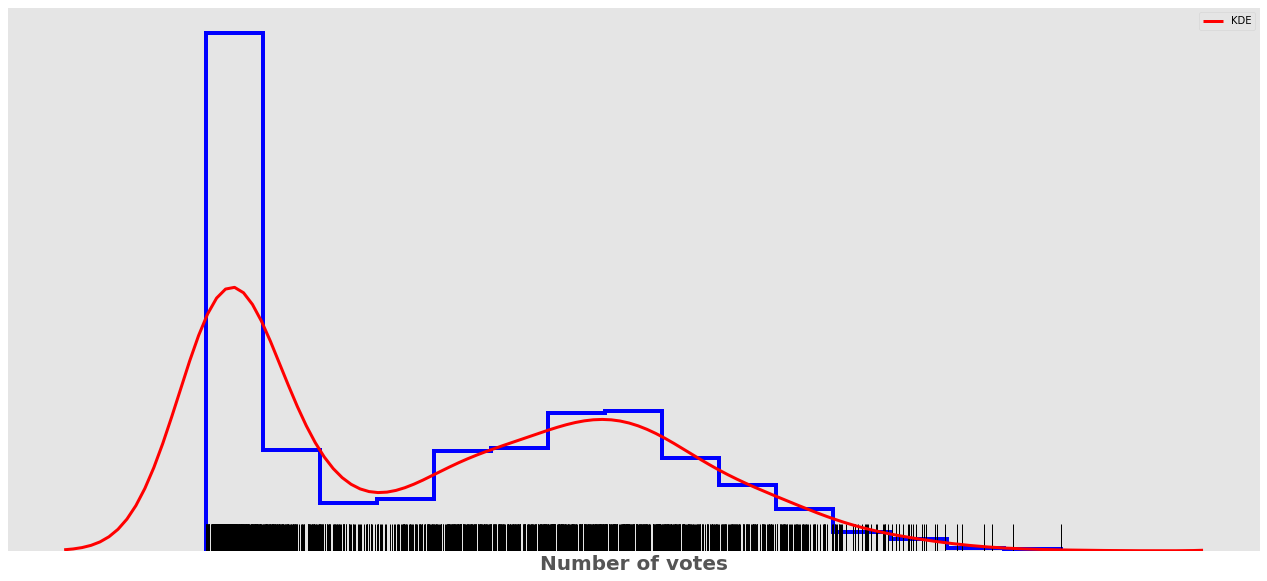

In [10]:
plt.figure(figsize=(20,10))
sns.distplot(election_data['TOTAL\nVOTES'],rug=True, rug_kws={"color": "black"},
                  kde_kws={"color": "red", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 4,
                            "alpha": 1, "color": "blue"})
plt.xticks([])
plt.yticks([])
plt.xlabel('Number of votes',fontsize=20,fontweight='bold')
plt.show()

* We can see that the total Number was votes is not normally distributed.

## <b>Number of candidates by top 10 party</b>

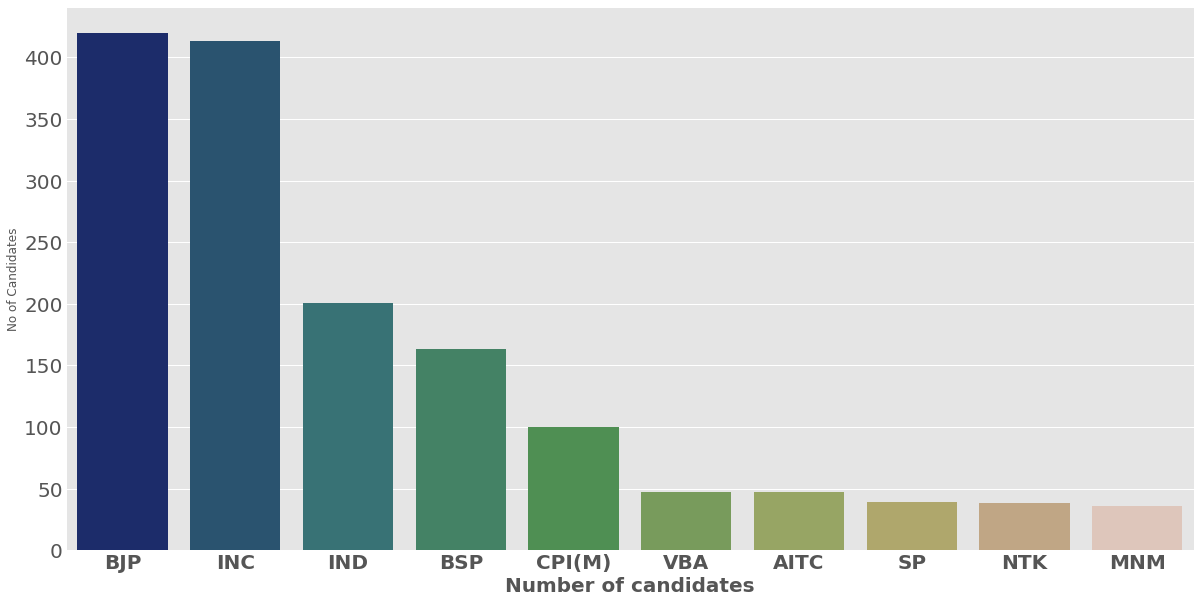

In [11]:
plt.figure(figsize=(18,10))
sns.countplot(x='PARTY',data=election_data,order=election_data.PARTY.value_counts().iloc[:10].index,palette='gist_earth')
plt.ylabel('No of Candidates')
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=20)
plt.xlabel('Party',fontsize=20,fontweight='bold')
plt.xlabel('Number of candidates',fontsize=20,fontweight='bold')
plt.show()

## <b>Gender Distribution of candidates</b>

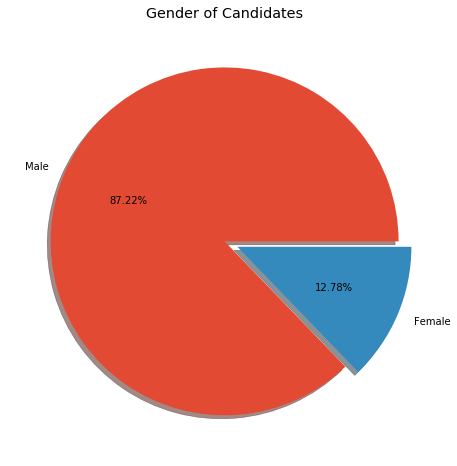

In [12]:
plt.figure(figsize=(16,8))
plt.pie(election_data['GENDER'].value_counts(),shadow=True,explode=[0,0.08],labels=['Male','Female'],autopct='%1.2f%%')
plt.title('Gender of Candidates')
plt.show()

## <b>Age Distribution of the candidates wrt gender and category</b>

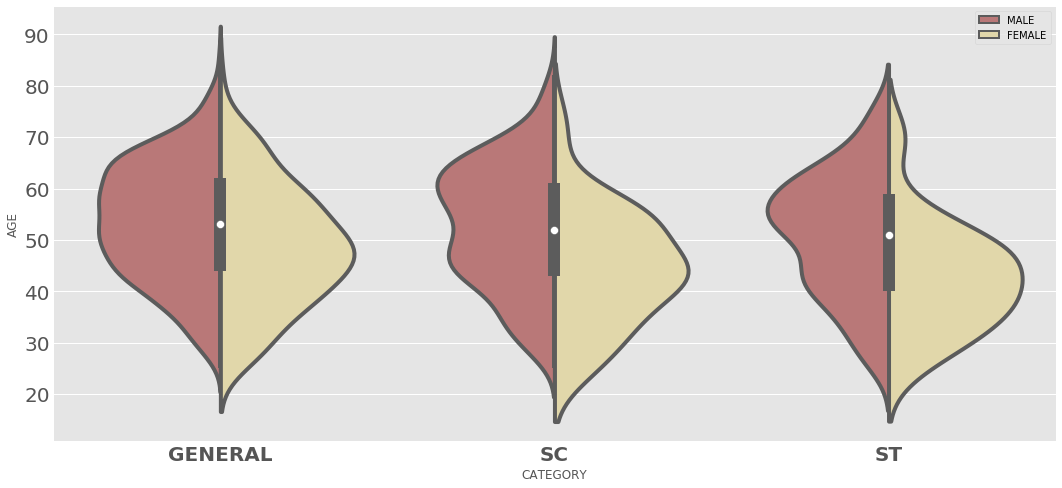

In [13]:
plt.figure(figsize=(16,8))
sns.violinplot(x='CATEGORY',y='AGE',data=election_data,hue='GENDER',palette='pink',split=True,saturation=1.5,order=['GENERAL','SC','ST'])
plt.legend(loc='upper right')
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=20)
plt.show()

* We observe that females have comparitively less mean age than males and the mean age of each category is approximately the same for both the genders

## <b>Analyzing the age distribution of candidates of the top 15 parties</b>

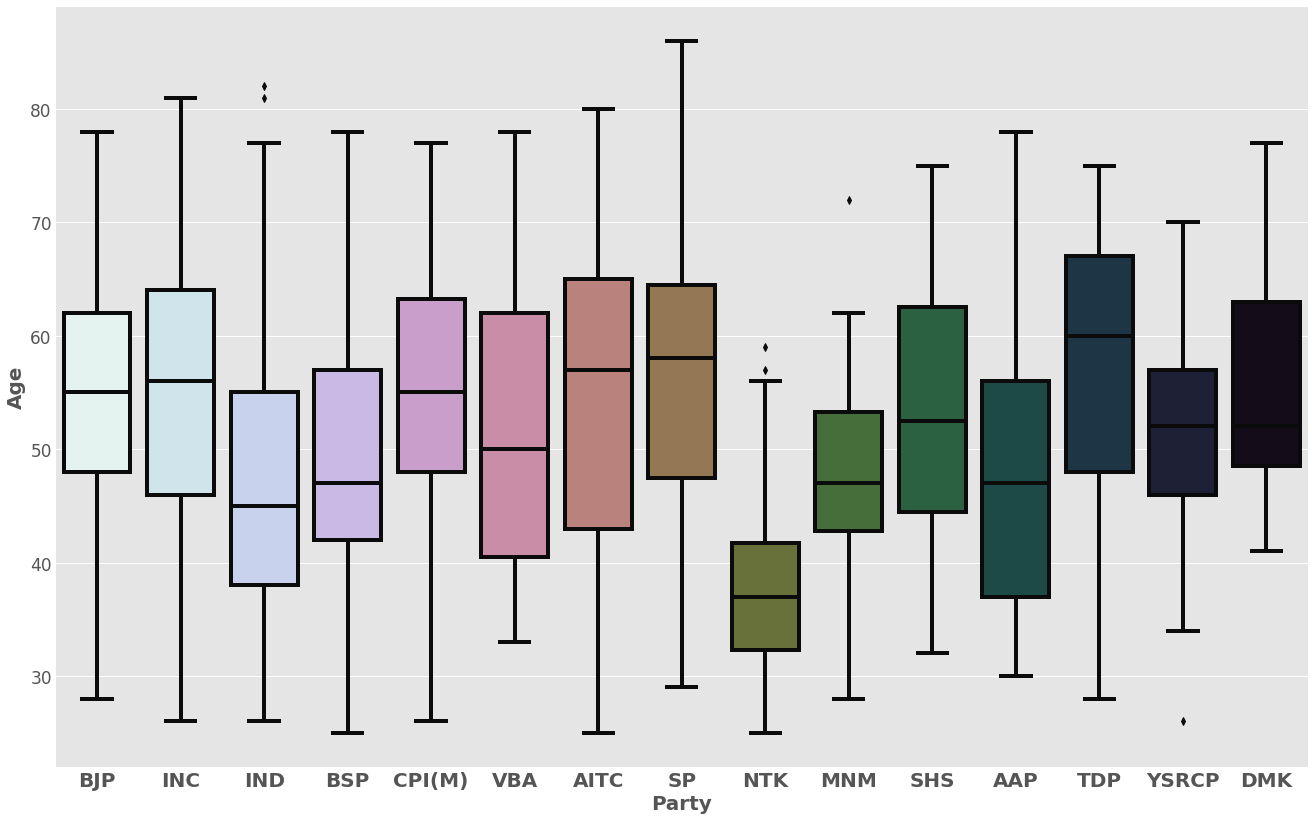

In [14]:
plt.figure(figsize=(20,14))
sns.boxplot(x='PARTY',y='AGE',data=election_data,palette='cubehelix_r',order=election_data.PARTY.value_counts().iloc[:15].index)
plt.xlabel('Party',fontdict={'fontsize':20})
plt.ylabel('Age',fontdict={'fontsize':20})
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=17)
plt.xlabel('Party',fontsize=20,fontweight='bold')
plt.ylabel('Age',fontsize=20,fontweight='bold')
plt.show()

* We see that the party 'AITC' and 'VBA' has the most distributed candidates by their ages while NTK had the youngest candidates on an average

## <b>Youngest MPs with their education</b>

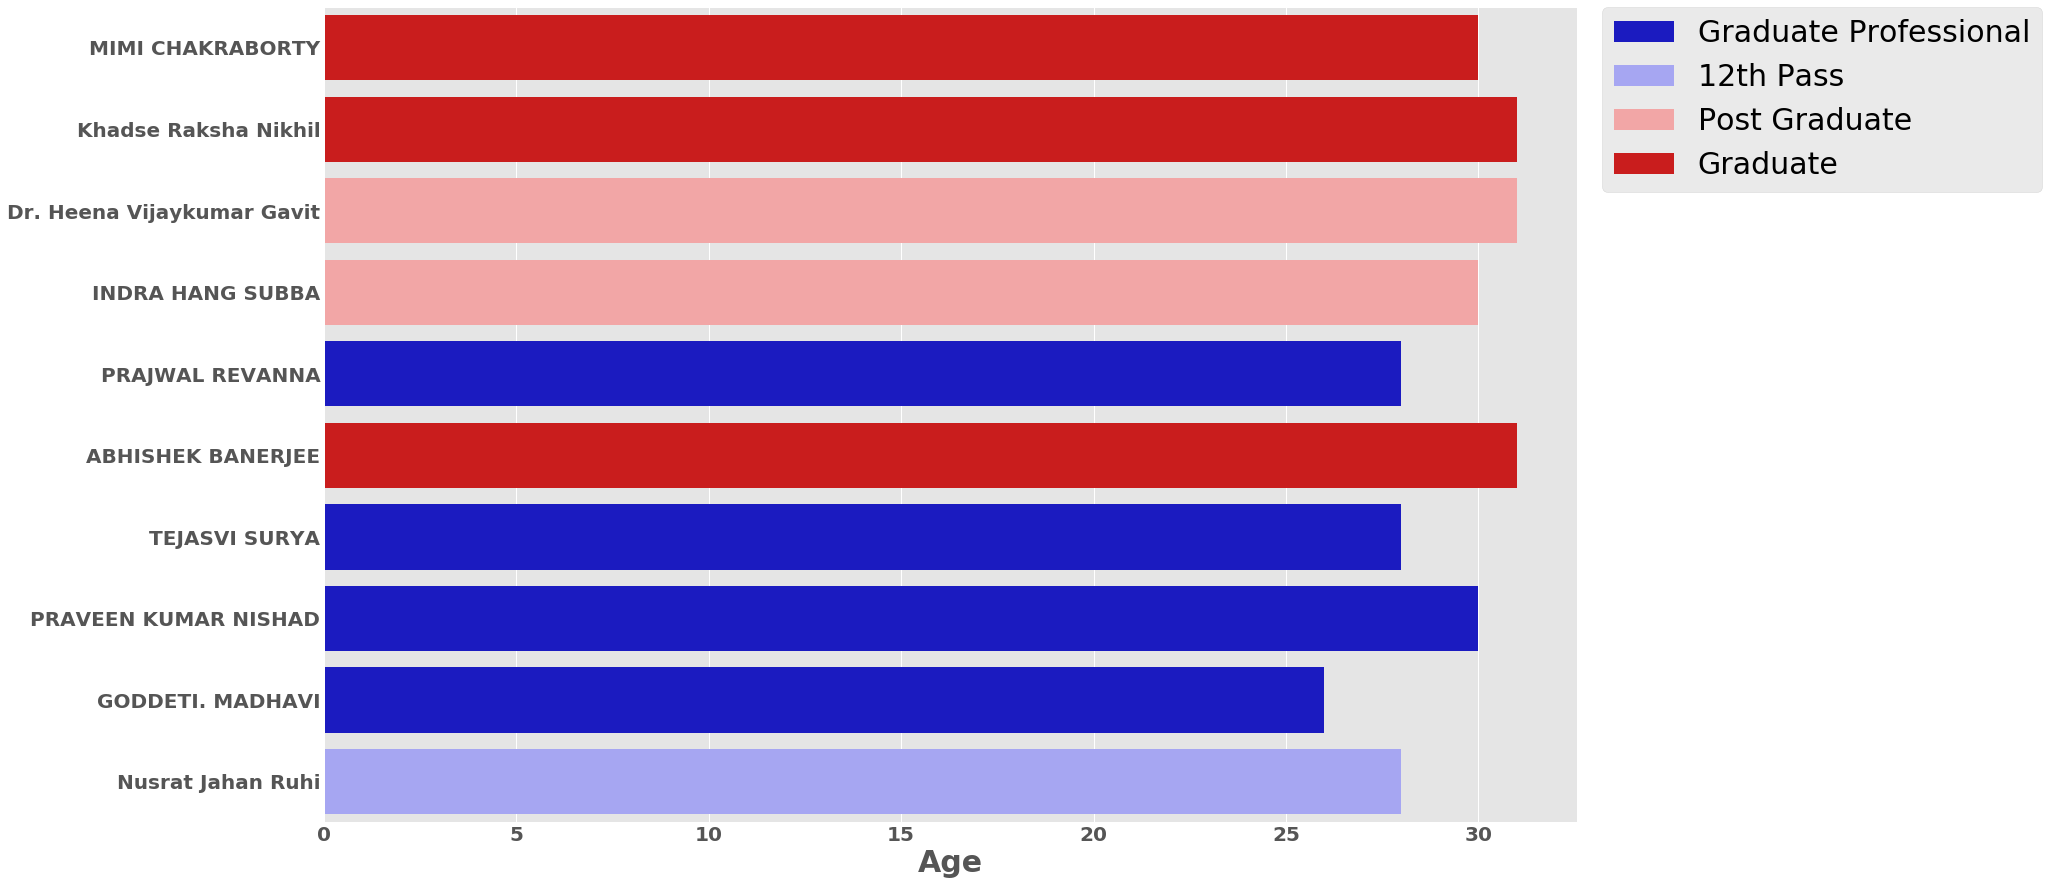

In [15]:
plt.figure(figsize=(20,15))
df4=election_data.sort_values('AGE')
df4=df4[df4['WINNER']==1].head(10)
sns.barplot(x='AGE',y='NAME',data=df4,order=df4.NAME.value_counts().iloc[:10].index,hue='EDUCATION',dodge=False,palette='seismic')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.,fontsize=30)
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=20,fontweight=1000)
plt.xlabel('Age',fontsize=30,fontweight=1000)
plt.ylabel('')
plt.show()

## <b>Eldest MPs with their parties:</b>

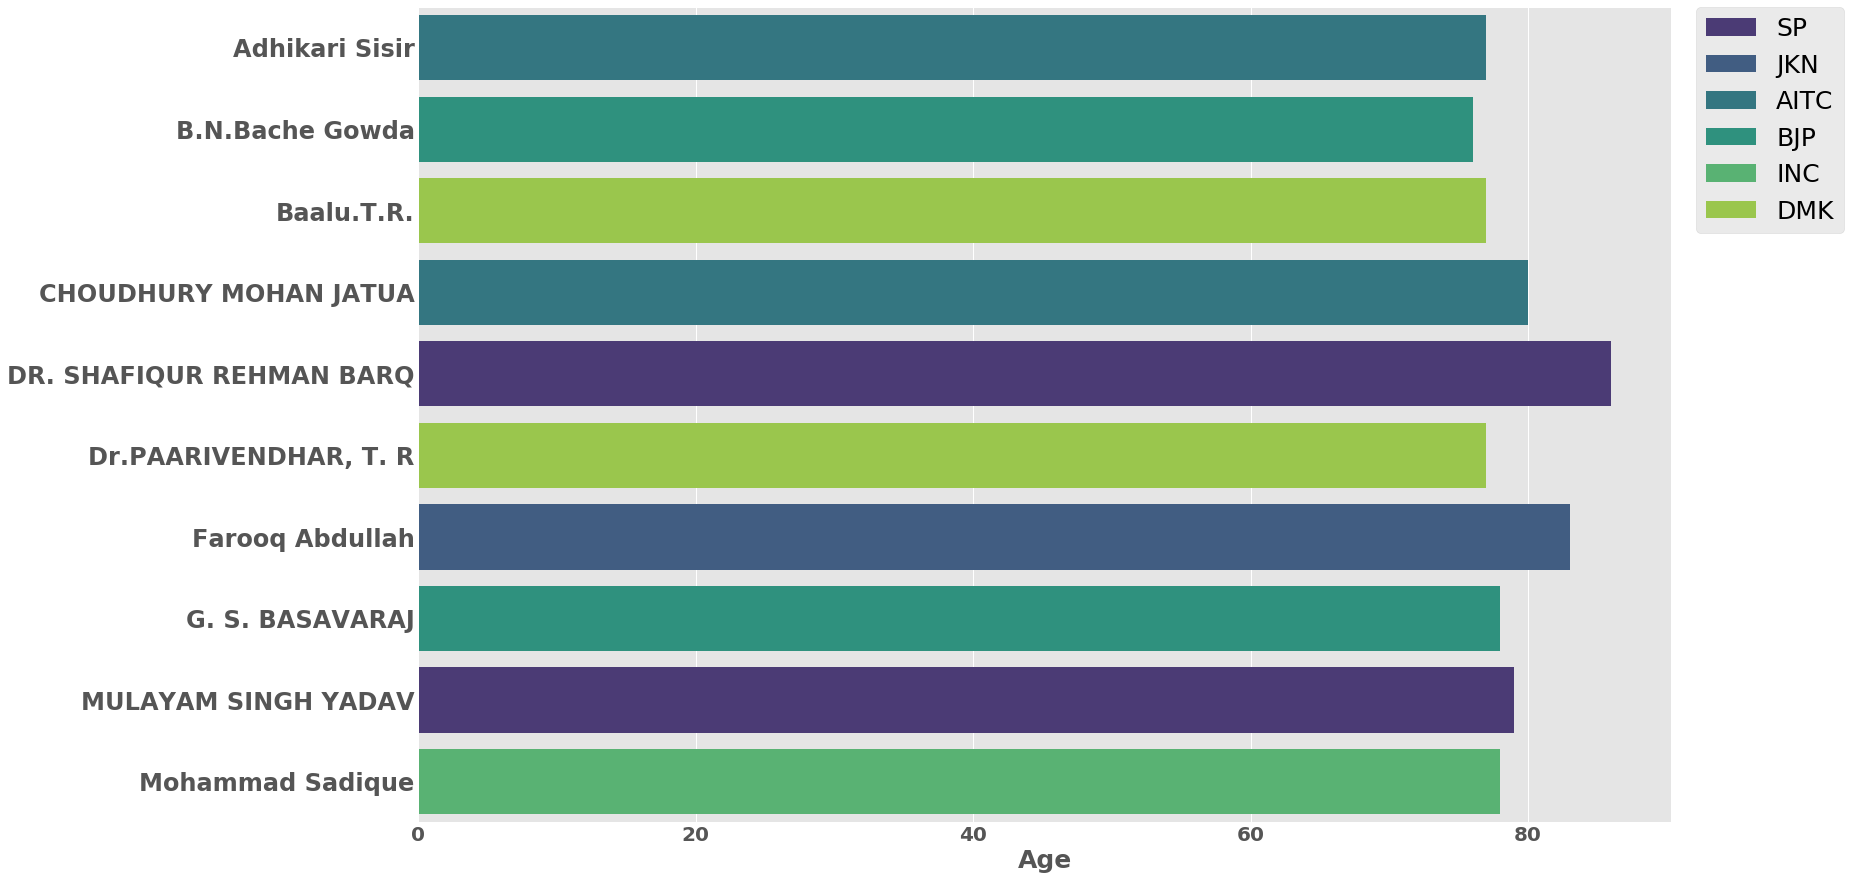

In [16]:
plt.figure(figsize=(20,15))
df4=election_data.sort_values('AGE',ascending=False)
df4=df4[df4['WINNER']==1].head(10)
sns.barplot(x='AGE',y='NAME',data=df4,order=df4.NAME.value_counts().iloc[:10].index.sort_values(),hue='PARTY',dodge=False,palette='viridis')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.,fontsize=25)
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=24,fontweight=1000)
plt.xlabel('Age',fontsize=25,fontweight=1000)
plt.ylabel('')
plt.show()

## <b>Top Candidates With Highest number of Criminal Cases</b>

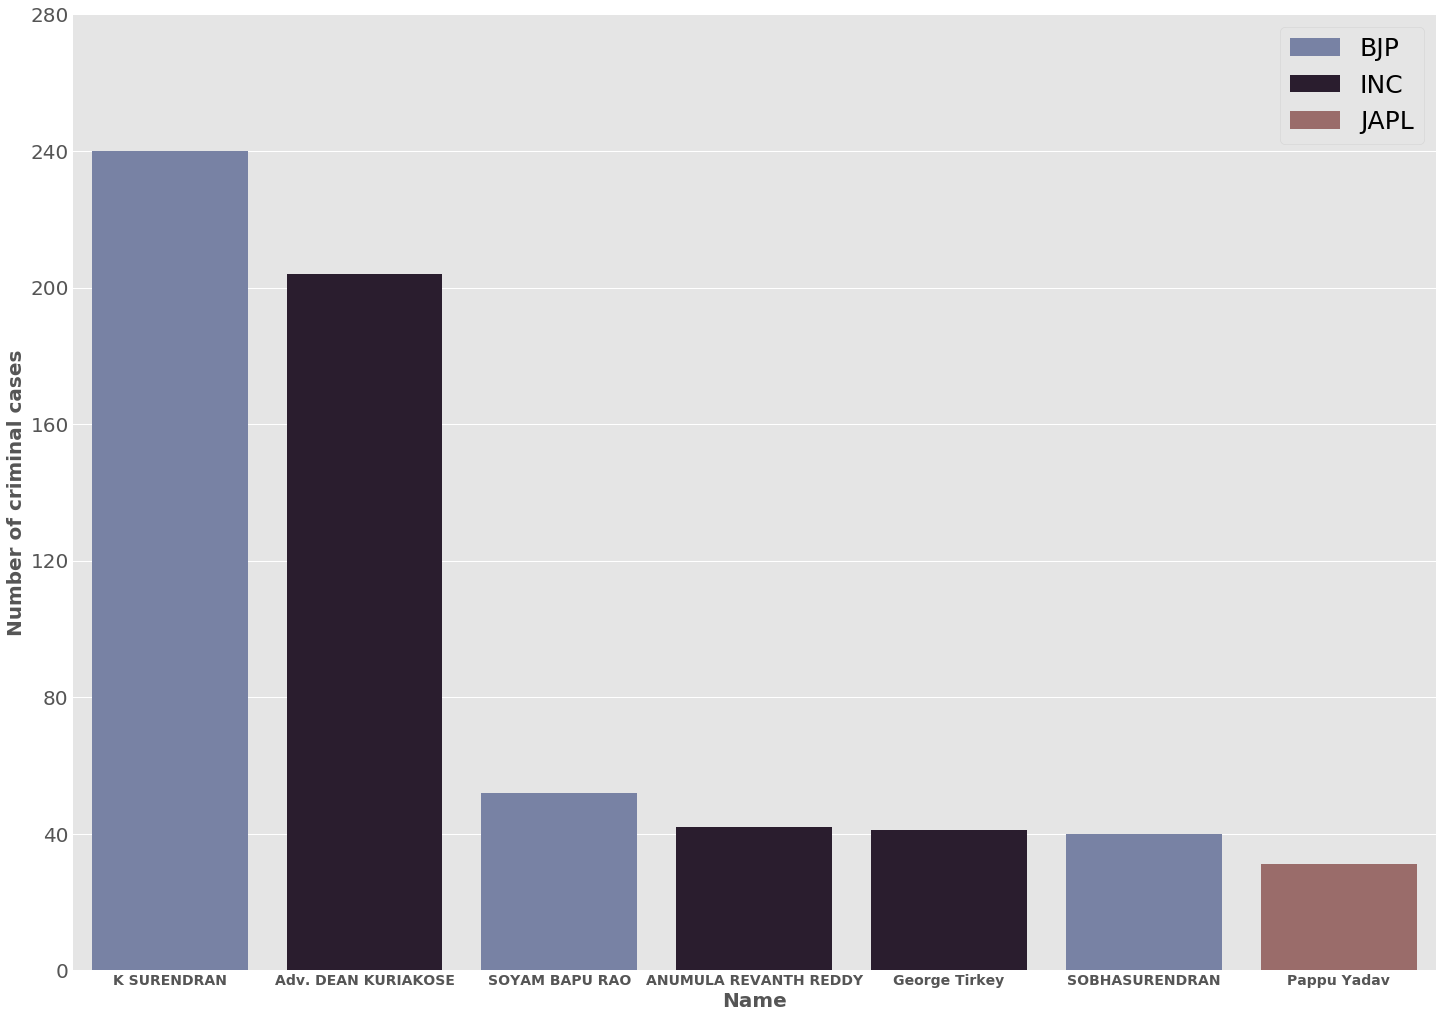

In [17]:
election_data['CRIMINAL\nCASES'].replace(['Not Available',np.nan],'0',inplace=True)
election_data['CRIMINAL\nCASES']=election_data['CRIMINAL\nCASES'].astype(float)
df3=election_data.copy()
df3.sort_values('CRIMINAL\nCASES',axis=0,ascending=False,inplace=True)
df3=df3.head(7)
plt.figure(figsize=(20,14))
sns.barplot(x='NAME',y='CRIMINAL\nCASES',data=df3,palette='twilight',hue='PARTY',dodge=False,saturation=0.5)
plt.tight_layout()
plt.legend(fontsize=25)
plt.xlabel('Name',fontsize=20,fontweight='bold')
plt.ylabel('Number of criminal cases',fontsize=20,fontweight='bold')
plt.xticks(fontsize=14,fontweight=1000)
plt.yticks(np.arange(0,281,40),fontsize=20)
plt.show()

## <b>Constituencies which voted the most</b>

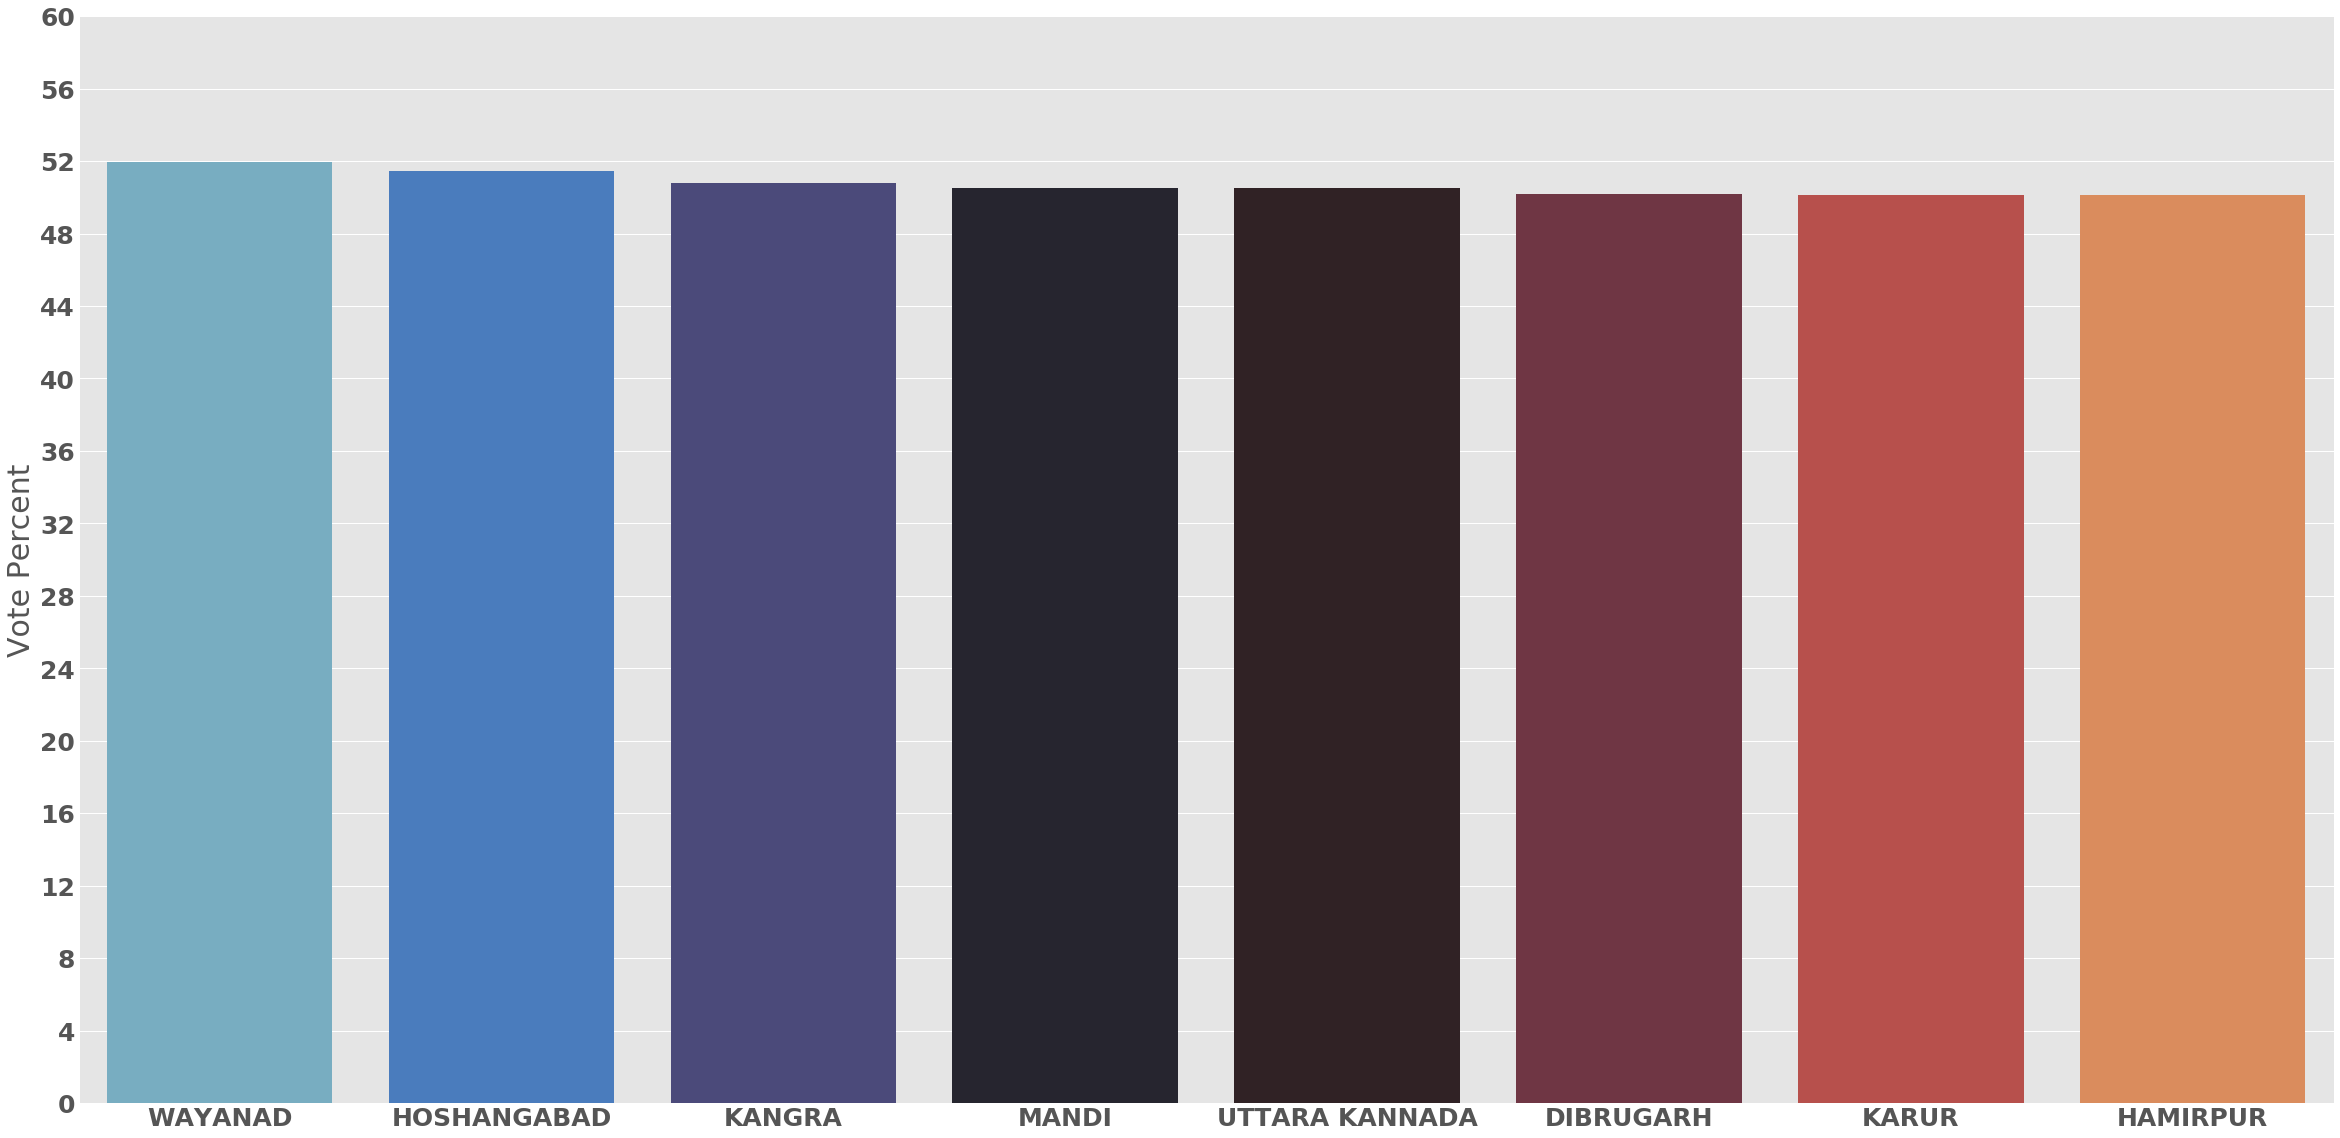

In [18]:
plt.style.use('seaborn-pastel')
yt=np.arange(0,61,4)
df3=election_data.copy()
df3['Vote Percent']=(df3['TOTAL\nVOTES']/df3['TOTAL ELECTORS'])*100
df3.sort_values(by='Vote Percent',axis=0,ascending=False,inplace=True)
df3=df3.head(8)
plt.figure(figsize=(36,20))
sns.barplot(x='CONSTITUENCY',y='Vote Percent',palette='icefire',data=df3)
plt.xticks(fontsize=25,fontweight=1000)
plt.yticks(yt,fontsize=25,fontweight=1000)
plt.ylabel('Vote Percent',fontsize=30)
plt.xlabel('')
plt.show()

## <b>Educational background of candidates</b>

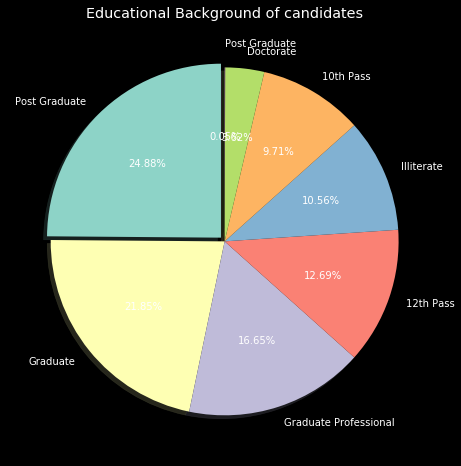

In [19]:
ill=['Others','Literate','5th Pass','Not Available','Illiterate','8th Pass']
df1=election_data.copy()
df1['EDUCATION']=df1['EDUCATION'].apply(lambda x:'Illiterate' if x in ill else x)
plt.style.use(['ggplot', 'dark_background'])
#plt.figure(figsize=(18,10))
labels=list(dict(df1['EDUCATION'].value_counts()))
data=list(df1['EDUCATION'].value_counts())
explode=[0.03,0,0,0,0,0,0,0]
plt.figure(figsize=(16,8))
plt.pie(data,explode,labels=labels,autopct='%1.2f%%',startangle=90,shadow=True)
plt.title('Educational Background of candidates')
plt.show()

## <b>Candidate Percentage with assets value</b>

In [20]:
## cleaning data for assets column
election_data['ASSETS'].replace(['Not Available','Nil',np.nan,'`','Telangana'],'0',inplace=True)
a=election_data['ASSETS'].apply(lambda x:x.split()[1] if len(x.split())>1 else x.split()[0])
b=a.apply(lambda x:x.split(','))
c=b.apply(lambda x:''.join(x))
election_data['ASSETS']=c
election_data['ASSESTS']=election_data['ASSETS'].astype(float)
no=(election_data['ASSESTS']==0).sum()
th=((election_data['ASSESTS']>1000) & (election_data['ASSESTS']<100000)).sum()
lac=((election_data['ASSESTS']>100000) & (election_data['ASSESTS']<10000000)).sum()
cr=(election_data['ASSESTS']>10000000).sum()
data=[no,th,lac,cr]
labels=['No assets','Assets in Thousands','Assets in lacs','Assets in crores']
explode=[0,0,0,0.02]

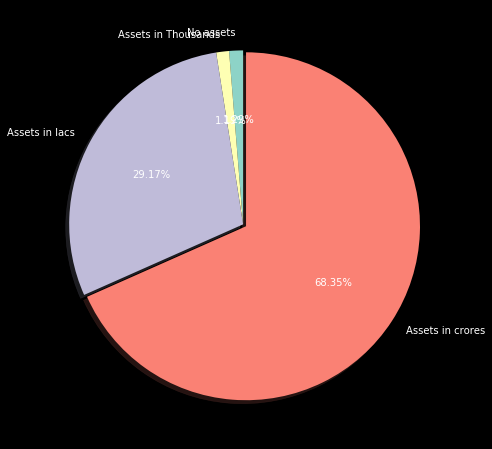

In [21]:
plt.style.use(['ggplot', 'dark_background'])
plt.figure(figsize=(16,8))
plt.pie(data,explode,labels=labels,autopct='%1.2f%%',startangle=90,shadow=True)
plt.show()

# <b>END OF Analysis Report</b>
# Thanks for your time!

## For model prediction click  <a href="https://github.com/akkysanap22/General-Election-2019/blob/master/Winner%20Prediction%20Model.ipynb">here</a>